# Tarea Desafío KNN

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-06

**Fecha de actualización:** 2022-02-06

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para escalar datos
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#Importar librerías para mostrar métricas

# r2 score - regresión
from sklearn.metrics import r2_score
# matriz de confusión - clasificación
from sklearn.metrics import confusion_matrix

import math


In [2]:
filename = 'data/abalone.data'
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Atributos
<table>
    <h>
        <td><b>Sex</b></td>
        <td><b>nominal</b></td>
        <td><b>Meas.</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>Length</td>
        <td>continuous</td>
        <td>mm</td>
        <td>Longest shell measurement</td>
    </tr>
    <tr>
        <td>Diameter</td>
        <td>continuous</td>
        <td>mm</td>
        <td>perpendicular to length</td>
    </tr>
    <tr>
        <td>Height</td>
        <td>continuous</td>
        <td>mm</td>
        <td>with meat in shell</td>
    </tr>
    <tr>
        <td>Whole weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>whole abalone</td>
    </tr>
    <tr>
        <td>Shucked weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>weight of meat</td>
    </tr>
    <tr>
        <td>Viscera weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>gut weight (after bleeding)</td>
    </tr>
    <tr>
        <td>Shell weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>after being dried</td>
    </tr>
    <tr>
        <td>Rings</td>
        <td>integer</td>
        <td></td>
        <td>+1.5 gives the age in years</td>
    </tr>
</table>

In [3]:

df.columns=['Sex','Length','Diameter','Height','WholeEeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings']
df.head()


,Sex,Length,Diameter,Height,WholeEeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeEeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,Length,Diameter,Height,WholeEeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


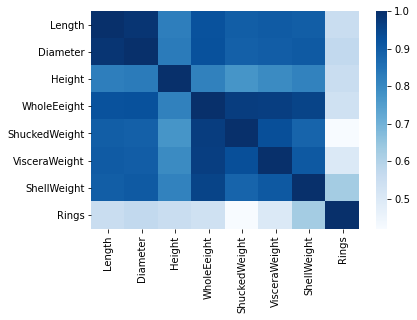

In [6]:
sns.heatmap(df.corr(), cmap='Blues')

## Estimación de la edad utilizando KNN(Regresión)

La edad del abulón se calcula de acuerdo al número de anillos:

$Edad = Rings +1.5$

### Utilizando los subconjuntos, disjuntos, de entrenamiento y pruebas

In [12]:
X = df.loc[:,['Length','Diameter','Height','WholeEeight','ShuckedWeight','VisceraWeight','ShellWeight']]
y = df.loc[:,'Rings']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 989837)


mejorR2 = 0
mejorN = 0
maxN = 50 + 1
minN = 1
printR = ''
for n in range(minN,maxN):
    # Regresor KNN
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X_train, y_train)

    # El número de 'Rings' + 1.5 es la edad, por lo tanto habrá que sumar 1.5 a las predicciones
    TestPredDf = pd.DataFrame(y_test)
    TestPredDf['RingsPred']=neigh.predict(X_test)
    TestPredDf['EdadPred']=neigh.predict(X_test)

    # Se suma 1.5 a todas las predicciones y se pronostica la edad del abulón
    TestPredDf['EdadPred'] = TestPredDf['EdadPred'].apply(lambda x: x+1.5)
    TestPredDf.head()

    # Mostrar el valor de R^2
    r2 = r2_score(y_test,TestPredDf['RingsPred'])
    printR = printR + f"R2({n}) = {round(r2,2)}\t"
    if n % 5 ==0 and n!=0:
        printR = printR + "\n"
    if r2 > mejorR2:
        mejorN = n
        mejorR2 = r2
# Mostrar los primeros resultados de los valores reales y los valores estimador
print(printR)
print (f"Se han probado desde {minN} hasta {maxN-1} vecinos.\nSe ha determinado que {mejorN} produce el mayor ajuste respecto a R2.\nR2={mejorR2}")


R2(1) = 0.21	R2(2) = 0.39	R2(3) = 0.45	R2(4) = 0.48	R2(5) = 0.49	
R2(6) = 0.5	R2(7) = 0.51	R2(8) = 0.51	R2(9) = 0.51	R2(10) = 0.51	
R2(11) = 0.51	R2(12) = 0.51	R2(13) = 0.51	R2(14) = 0.51	R2(15) = 0.51	
R2(16) = 0.51	R2(17) = 0.51	R2(18) = 0.51	R2(19) = 0.51	R2(20) = 0.51	
R2(21) = 0.5	R2(22) = 0.5	R2(23) = 0.5	R2(24) = 0.5	R2(25) = 0.5	
R2(26) = 0.5	R2(27) = 0.5	R2(28) = 0.5	R2(29) = 0.5	R2(30) = 0.5	
R2(31) = 0.5	R2(32) = 0.5	R2(33) = 0.5	R2(34) = 0.49	R2(35) = 0.49	
R2(36) = 0.49	R2(37) = 0.49	R2(38) = 0.49	R2(39) = 0.49	R2(40) = 0.49	
R2(41) = 0.49	R2(42) = 0.48	R2(43) = 0.48	R2(44) = 0.48	R2(45) = 0.48	
R2(46) = 0.48	R2(47) = 0.48	R2(48) = 0.48	R2(49) = 0.47	R2(50) = 0.47	

Se han probado desde 1 hasta 50 vecinos.
Se ha determinado que 12 produce el mayor ajuste respecto a R2.
R2=0.5125337013867649


### Utilizando el conjunto de datos completo tanto para entrenamiento como pruebas

In [8]:
X = df.loc[:,['Length','Diameter','Height','WholeEeight','ShuckedWeight','VisceraWeight','ShellWeight']]
y = df.loc[:,'Rings']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

mejorR2 = 0
mejorN = 0
maxN = 50 + 1
minN = 1
printR = ''
for n in range(minN,maxN):
    # Regresor KNN
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X, y)

    # El número de 'Rings' + 1.5 es la edad, por lo tanto habrá que sumar 1.5 a las predicciones
    TestPredDf = pd.DataFrame(y)
    TestPredDf['RingsPred']=neigh.predict(X)
    TestPredDf['EdadPred']=neigh.predict(X)

    # Se suma 1.5 a todas las predicciones y se pronostica la edad del abulón
    TestPredDf['EdadPred'] = TestPredDf['EdadPred'].apply(lambda x: x+1.5)
    TestPredDf.head()

    # Mostrar el valor de R^2
    r2 = r2_score(y,TestPredDf['RingsPred'])
    printR = printR + f"R2({n}) = {round(r2,2)}\t"
    if n % 5 ==0 and n!=0:
        printR = printR + "\n"
    if r2 > mejorR2:
        mejorN = n
        mejorR2 = r2
# Mostrar los primeros resultados de los valores reales y los valores estimador
print(printR)
print (f"Se han probado desde 1 hasta {maxN-1} vecinos.\nSe ha determinado que {mejorN} produce el mayor ajuste respecto a R2.\nR2={mejorR2}")

R2(1) = 1.0	R2(2) = 0.8	R2(3) = 0.72	R2(4) = 0.69	R2(5) = 0.66	
R2(6) = 0.65	R2(7) = 0.64	R2(8) = 0.63	R2(9) = 0.62	R2(10) = 0.62	
R2(11) = 0.62	R2(12) = 0.61	R2(13) = 0.61	R2(14) = 0.61	R2(15) = 0.6	
R2(16) = 0.6	R2(17) = 0.59	R2(18) = 0.59	R2(19) = 0.59	R2(20) = 0.59	
R2(21) = 0.59	R2(22) = 0.59	R2(23) = 0.58	R2(24) = 0.58	R2(25) = 0.58	
R2(26) = 0.58	R2(27) = 0.58	R2(28) = 0.58	R2(29) = 0.58	R2(30) = 0.58	
R2(31) = 0.57	R2(32) = 0.57	R2(33) = 0.57	R2(34) = 0.57	R2(35) = 0.57	
R2(36) = 0.57	R2(37) = 0.57	R2(38) = 0.57	R2(39) = 0.57	R2(40) = 0.57	
R2(41) = 0.57	R2(42) = 0.56	R2(43) = 0.56	R2(44) = 0.56	R2(45) = 0.56	
R2(46) = 0.56	R2(47) = 0.56	R2(48) = 0.56	R2(49) = 0.56	R2(50) = 0.56	

Se han probado desde 1 hasta 50 vecinos.
Se ha determinado que 1 produce el mayor ajuste respecto a R2.
R2=1.0


## Comparativa: con y sin división entrenar probar KNN
KNN estima mediante el promedio de los valores reales de la variable dependiente de los $N_{vecinos}$ vecinos más próximos.

Cuando las pruebas se realizan sobre el mismo conjunto de entrenamiento, el algoritmo KNN presenta un ajuste $R^2 = 1$ para $N_{vecinos}=1$, es decir un ajuste perfecto. Sin embargo. la naturaleza de este sobreajuste se debe a que si entrenamos y probamos KNN sobre el mismo conjunto de datos y con $N_{vecinos}=1$, dado que la distancia a si mismo es $0$ (cero), entonces el valor real y el estimado será el mismo para todos los casos. Por lo tanto: $R^2 = 1$.

Según se incremente $N_{vecinos}$, $R^2$ reduce conforme incrementa el número de vecinos. Este comportamiento se debe a que mientras más vecinos sean promediados, menor impacto tendra el elemento de distancia $0$(cero) sobre el resultado.

# Regresión lineal

In [9]:
X = df.loc[:,['Length','Diameter','Height','WholeEeight','ShuckedWeight','VisceraWeight','ShellWeight']]
y = df.loc[:,'Rings']

reg = LogisticRegression(max_iter=1000)
reg.fit(X,y)
# El número de 'Rings' + 1.5 es la edad, por lo tanto habrá que sumar 1.5 a las predicciones
TestPredDf = pd.DataFrame(y)
TestPredDf['RingsPred']=reg.predict(X)
TestPredDf['EdadPred']=reg.predict(X)

# Se suma 1.5 a todas las predicciones y se pronostica la edad del abulón
TestPredDf['EdadPred'] = TestPredDf['EdadPred'].apply(lambda x: x+1.5)
TestPredDf.head()

print(f"R2 = {reg.score(X,y)}")


R2 = 0.2657409624132152


In [10]:
X = df.loc[:,['Length','Diameter','Height','WholeEeight','ShuckedWeight','VisceraWeight','ShellWeight']]
y = df.loc[:,'Rings']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 1492)

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train,y_train)
# El número de 'Rings' + 1.5 es la edad, por lo tanto habrá que sumar 1.5 a las predicciones
TestPredDf = pd.DataFrame(y_test)
TestPredDf['RingsPred']=reg.predict(X_test)
TestPredDf['EdadPred']=reg.predict(X_test)

# Se suma 1.5 a todas las predicciones y se pronostica la edad del abulón
TestPredDf['EdadPred'] = TestPredDf['EdadPred'].apply(lambda x: x+1.5)
TestPredDf.head()

print(f"R2 = {reg.score(X_test,y_test)}")

R2 = 0.24356672651107122


### Preguntas

1. **¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?**

El valor de $R^2$ en KNN es mayor, sin embargo las pruebas en KNN sobre el mismo conjunto de datos de entrenamiento son altamente influenciadas por por el vecino de sistancia $0$ cero. A pesar de esto, KNN parece desempeñarse mejor.

2. **¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?**

En este caso resulto, al igual que en el anterior, ser mejor KNN. En el caso de KNN se realizaron pruebas desde 1 a 50 vecinos.

3. **¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?**

4. **¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?**

5. **¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?**